# GRIP:THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN

## AUTHOR: GHULE SACHIN YASHWANT

## TASK 1: PREDICATION USING SUPERVISED ML

###  In this task we have to predict the percentage score of student based on the no of hours studied. The task has two variable where the feature is the no of hours studied and the target value is percentage score . This can be solve using liner regression 


In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data from remote URL

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

#### Exploring Data

In [3]:
print(data.shape)
data.head()

(25, 2)


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [4]:
data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


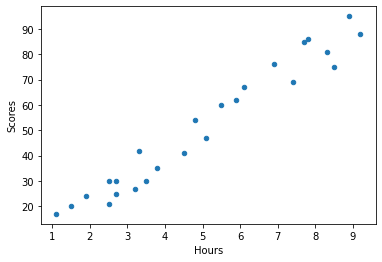

In [6]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [7]:
data.corr(method='pearson')

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

In [8]:
data.corr(method='spearman')

Hours    Scores
Hours   1.000000  0.971891
Scores  0.971891  1.000000

In [9]:
hours=['Hours']
scores=['Scores']

In [10]:
hours=data['Hours']
scores=data['Scores']

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

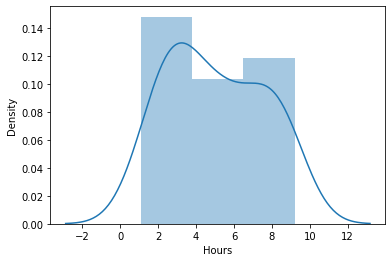

In [11]:
sns.distplot(hours)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

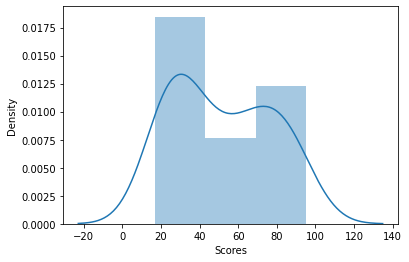

In [12]:
sns.distplot(scores)

#### Linear Regression

In [13]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=50)

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

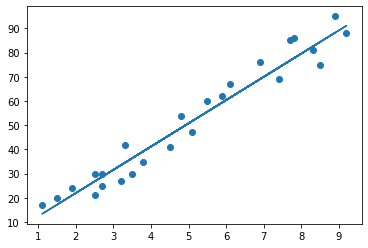

In [16]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [17]:
y_pred=reg.predict(x_test)

In [18]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

Target  Predicted
0      95  88.211394
1      30  28.718453
2      76  69.020122
3      35  39.273652
4      17  13.365436

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


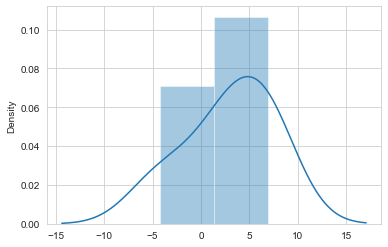

In [19]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

#### What would be the predicted score of student if he studied for 9.25 hours

In [20]:
h=9.25
s=reg.predict([[h]])
print("If a student studied for {} hours per day then he/she will score {} percent in exam.".format(h,s))

If a student studied for 9.25 hours per day then he/she will score [91.56986604] percent in exam.


#### Model Evaluation


In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:',r2_score(y_test, y_pred))

Mean Absolute Error: 4.5916495300630285
R2 score: 0.971014141329942
